In [1]:
from power_system.Bus_System import Bus_system
import numpy as np

In [2]:
#Carrega sistema do IEEE
bus_sys = Bus_system(118)

In [3]:
meas_plan_file = 'meas_plan118b333m.txt'
meas_plan = np.loadtxt(meas_plan_file,dtype=np.int32)

In [4]:
from f_Graph import*

IndentationError: expected an indented block (f_Graph.py, line 159)

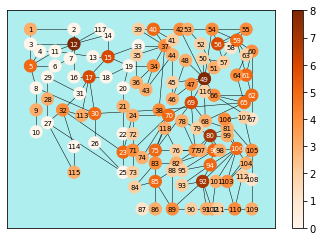

In [ ]:
Dg = build_measurement_dist_graph(bus_sys,meas_plan)
show_measurement_dist_graph(Dg,Dg.coordinates)

In [ ]:
groups = []
groups.append(np.loadtxt('Grupo1.txt',dtype=int))
groups.append(np.loadtxt('Grupo2.txt',dtype=int))
groups.append(np.loadtxt('Grupo3.txt',dtype=int))


In [ ]:
def set_groups(Dg,groups):
    n_group = 1
    for group in groups:
        for node in group: 
            Dg.nodes[node]['group'] = n_group
        n_group+=1


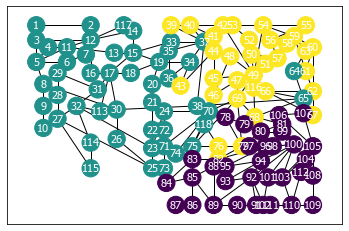

In [ ]:
set_groups(Dg,groups)
numeros_das_barras = {x: x for x in Dg.nodes}
show_groups(Dg,Dg.coordinates)

In [ ]:
#Identificar barras de fronteira
def find_border_nodes(G):
    border = set()
    for node in G.nodes():
        group_from = G.nodes[node]['group']
        for neigh in G.neighbors(node):
            group_to = G.nodes[neigh]['group']
            if(group_from!= group_to): border.add(node)

    return border

In [ ]:
def show_border_nodes(Graph,coordinates,save=False):
    bus_numbers = {x: x for x in Graph.nodes}

    border_nodes = find_border_nodes(Dg)

    #Cria grupo com elementos únicos
    groups = set(nx.get_node_attributes(Graph,'group').values())
    #Cria Dicionário de Cores para cada grupo
    mapping = dict(zip(sorted(groups),count()))
    colors = [mapping[Graph.nodes[n]['group']] for n in Graph.nodes]
    for node in border_nodes:
        colors[node-1] = len(mapping)
    nx.draw_networkx_labels(Graph, coordinates, bus_numbers, font_size=11, font_color='w', font_family = "Tahoma", font_weight = "normal")
    nx.draw_networkx_nodes(Graph, coordinates, node_size = 300, node_color=colors, alpha=1, node_shape='o')
    nx.draw_networkx_edges(Graph, coordinates, edge_color = 'black')



    if save:
        plt.savefig('fig grupos.png')

    plt.show()

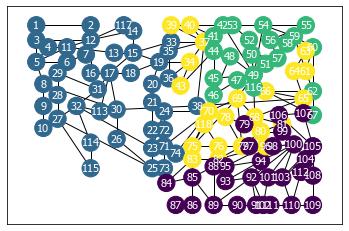

In [ ]:
border_nodes =find_border_nodes(Dg)
show_border_nodes(Dg,Dg.coordinates)

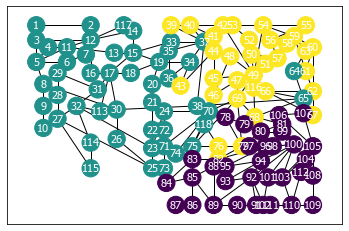

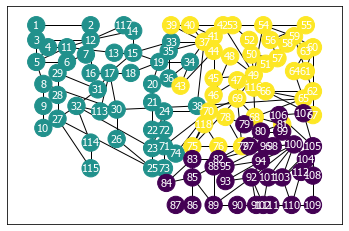

In [ ]:
show_groups(Dg,Dg.coordinates)

Copy_Dg=Dg.copy()
Copy_Dg.coordinates=Dg.coordinates
for border_node in border_nodes:
    shortest_paths=shortest_path_BFS(Dg,border_node)
    groups=set(nx.get_node_attributes(Dg,'group').values())
    dist_to_group={i:0 for i in groups}
    size_of_group={i:0 for i in groups}

    for node in Dg.nodes:
        group=Dg.nodes[node]['group']
        dist_to_group[group] += shortest_paths[node]
        size_of_group[group] += 1

    for group in dist_to_group:
        dist_to_group[group] = dist_to_group[group]/size_of_group[group]

    closest_distance=min(dist_to_group.values())
    closest_group = min(dist_to_group, key=dist_to_group.get)
    #if closest_distance<4:
    Copy_Dg.nodes[border_node]['group'] = closest_group

show_groups(Copy_Dg,Dg.coordinates)


In [ ]:
def get_obj_func(n_meas_in_group):
    objective = 0 
    total_meas = sum(n_meas_in_group.values())
    n_groups = len(n_meas_in_group)
    avg_n_meas = total_meas/n_groups
    for n_meas in n_meas_in_group.values():
        objective = objective + abs(n_meas-avg_n_meas)

    return objective  

In [ ]:
meas_in_group = get_measurements_in_group(Dg)
objective = get_obj_func(meas_in_group)
print(meas_in_group,objective)
meas_in_group = get_measurements_in_group(Copy_Dg)
objective = get_obj_func(meas_in_group)
print(meas_in_group,objective)

{1: 111, 2: 110, 3: 112} 2.0
{1: 108, 2: 84, 3: 141} 60.0


Estrategia de remover outiliners de acordo com a distancia dos grupos de fronteira com médida com as distâncias de cada um dos grupos. 
Grupos se tornaram mais convexos, porém também se tornaram mais desbalanceados.

##5 de janeiro de 2023 
Tentativa, ordenar barras de fronteira de acordo com proximidade
alterar barras até um limite de função Objetivo

69 {1: 111, 2: 110, 3: 112} 2.0
66 {1: 111, 2: 110, 3: 112} 2.0
96 {1: 111, 2: 110, 3: 112} 2.0
65 {1: 111, 2: 105, 3: 117} 12.0
68 {1: 111, 2: 105, 3: 117} 12.0
80 {1: 111, 2: 105, 3: 117} 12.0
77 {1: 111, 2: 105, 3: 117} 12.0
75 {1: 111, 2: 100, 3: 122} 22.0
82 {1: 114, 2: 100, 3: 119} 22.0
40 {1: 114, 2: 100, 3: 119} 22.0
61 {1: 114, 2: 100, 3: 119} 22.0
70 {1: 114, 2: 95, 3: 124} 32.0
64 {1: 114, 2: 91, 3: 128} 40.0
63 {1: 114, 2: 91, 3: 128} 40.0
83 {1: 114, 2: 91, 3: 128} 40.0
37 {1: 114, 2: 87, 3: 132} 48.0
81 {1: 111, 2: 87, 3: 135} 48.0
39 {1: 111, 2: 87, 3: 135} 48.0
76 {1: 111, 2: 87, 3: 135} 48.0
43 {1: 111, 2: 87, 3: 135} 48.0
78 {1: 108, 2: 87, 3: 138} 54.0
34 {1: 108, 2: 87, 3: 138} 54.0
118 {1: 108, 2: 84, 3: 141} 60.0


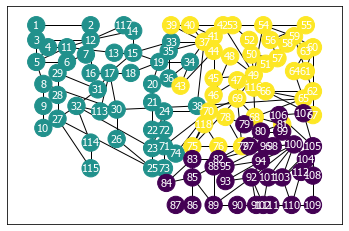

In [ ]:
#show_groups(Dg)

Copy_Dg=Dg.copy()
Copy_Dg.coordinates=Dg.coordinates
closest_distance={}
closest_group={}
for border_node in border_nodes:
    shortest_paths=shortest_path_BFS(Dg,border_node)
    groups=set(nx.get_node_attributes(Dg,'group').values())
    dist_to_group={i:0 for i in groups}
    size_of_group={i:0 for i in groups}

    for node in Dg.nodes:
        group=Dg.nodes[node]['group']
        dist_to_group[group] += shortest_paths[node]
        size_of_group[group] += 1

    for group in dist_to_group:
        dist_to_group[group] = dist_to_group[group]/size_of_group[group]

    
    closest_distance[border_node]=min(dist_to_group.values())
    closest_group[border_node] = min(dist_to_group, key=dist_to_group.get)
    
d_view = [ (v,k) for k,v in closest_distance.items()]
d_view.sort(reverse=False) # natively sort tuples by first element
for v,k in d_view:
    previous_group = Copy_Dg.nodes[k]['group']
    Copy_Dg.nodes[k]['group']=closest_group[k]
    meas_in_group = get_measurements_in_group(Copy_Dg)
    objective = get_obj_func(meas_in_group)
    #if(objective>40):
    #Copy_Dg.nodes[k]['group']=previous_group
    print(k,meas_in_group,objective)

show_groups(Copy_Dg,Copy_Dg.coordinates)

In [ ]:
for i in Copy_Dg.neighbors(75): print(i)

69
70
74
77
118


In [ ]:
def build_graph_of_group(Graph,group):
    sub_graph =nx.Graph()

    for node in Graph.nodes():
        if (Graph.nodes[node]['group'] == group):
            sub_graph.add_node(node,group=group) 

    for i,j in Graph.edges():    
        if (Graph.nodes[i]['group'] == group) and (Graph.nodes[j]['group'] == group):
            sub_graph.add_edge(i,j)

    return sub_graph

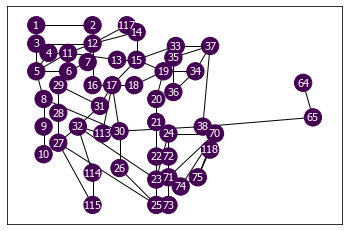

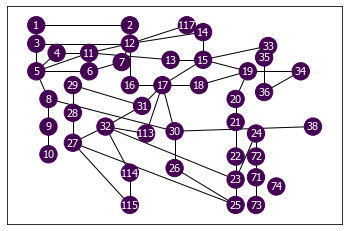

In [ ]:
g=2
graph_g1 =build_graph_of_group(Dg,g)
show_groups(graph_g1,Dg.coordinates)

graph_g2 =build_graph_of_group(Copy_Dg,g)
show_groups(graph_g2,Dg.coordinates)

Avaliação por Vizinhos não resolveu o problema, 

In [ ]:
#show_groups(Dg)

Copy_Dg=Dg.copy()
Copy_Dg.coordinates=Dg.coordinates
for border_node in border_nodes:
    shortest_paths=shortest_path_BFS(Dg,border_node)
    groups=set(nx.get_node_attributes(Dg,'group').values())
    dist_to_group={i:0 for i in groups}
    size_of_group={i:0 for i in groups}

    for node in Dg.nodes:
        group=Dg.nodes[node]['group']
        dist_to_group[group] += shortest_paths[node]
        size_of_group[group] += 1

    for group in dist_to_group:
        dist_to_group[group] = dist_to_group[group]/size_of_group[group]
    avg=0
    for group in dist_to_group:
        avg += dist_to_group[group]
    avg = avg/len(dist_to_group)
    closest_distance=min(dist_to_group.values())
    closest_group = min(dist_to_group, key=dist_to_group.get)
    print(border_node,'%2.2f,%2.2f,%2.2f'%(dist_to_group[1],dist_to_group[2],dist_to_group[3]),abs(closest_distance-avg))
    #print(border_node,closest_group,closest_distance)
    if abs(closest_distance-avg)>1.2:
        Copy_Dg.nodes[border_node]['group'] = closest_group

#     meas_in_group = get_measurements_in_group(Copy_Dg)
#     objective = get_obj_func(meas_in_group)
#     print(meas_in_group,objective)

# show_groups(Copy_Dg)

34 8.91,4.33,4.70 1.647355912061796
37 7.91,4.04,3.94 1.357397504456328
39 8.65,4.88,4.21 1.7017231134878195
40 7.68,4.73,3.45 1.8309566250742724
43 8.68,5.06,4.30 1.7097445038621517
61 7.91,6.18,3.45 2.393048128342246
63 7.91,6.18,3.64 2.271836007130126
64 6.91,5.18,3.52 1.6859774212715393
65 5.91,4.22,3.03 1.3556149732620328
66 6.65,5.02,2.52 2.2121212121212124
68 4.91,4.76,3.09 1.16488413547237
69 4.68,5.02,2.48 1.5754604872251927
70 5.68,4.98,3.48 1.2290552584670231
75 4.71,5.53,3.39 1.1491384432560898
76 4.71,6.92,4.24 1.0475341651812249
77 3.71,5.96,3.30 1.0202020202020203
78 4.59,6.96,4.30 0.9809863339275102
80 3.18,6.37,4.18 1.4004753416518123
81 4.12,5.76,4.00 0.6274509803921573
82 3.44,6.96,4.24 1.4402852049910875
83 3.88,7.96,5.24 1.8128342245989306
96 2.91,7.37,5.12 2.223410576351753
118 5.71,6.49,4.33 1.1764705882352935


In [ ]:
Copy_Dg=Dg.copy()
Copy_Dg.coordinates=Dg.coordinates
for border_node in border_nodes:
    groups=set(nx.get_node_attributes(Dg,'group').values())
    neighbors_of_group={i:0 for i in groups}
    for neighbor in Dg.neighbors(border_node):
        group=Dg.nodes[neighbor]['group']
        neighbors_of_group[group] += 1

    avg=0
    for group in neighbors_of_group:
        avg += neighbors_of_group[group]
    avg = avg/len(neighbors_of_group)

    print(border_node,neighbors_of_group,avg)

34 {1: 0, 2: 3, 3: 1} 1.3333333333333333
37 {1: 0, 2: 4, 3: 2} 2.0
39 {1: 0, 2: 1, 3: 1} 0.6666666666666666
40 {1: 0, 2: 1, 3: 3} 1.3333333333333333
43 {1: 0, 2: 1, 3: 1} 0.6666666666666666
61 {1: 0, 2: 1, 3: 3} 1.3333333333333333
63 {1: 0, 2: 1, 3: 1} 0.6666666666666666
64 {1: 0, 2: 1, 3: 2} 1.0
65 {1: 0, 2: 2, 3: 2} 1.3333333333333333
66 {1: 0, 2: 1, 3: 3} 1.3333333333333333
68 {1: 1, 2: 1, 3: 2} 1.3333333333333333
69 {1: 0, 2: 2, 3: 4} 2.0
70 {1: 0, 2: 4, 3: 1} 1.6666666666666667
75 {1: 0, 2: 3, 3: 2} 1.6666666666666667
76 {1: 0, 2: 1, 3: 1} 0.6666666666666666
77 {1: 2, 2: 1, 3: 3} 2.0
78 {1: 1, 2: 0, 3: 1} 0.6666666666666666
80 {1: 6, 2: 0, 3: 1} 2.3333333333333335
81 {1: 1, 2: 0, 3: 1} 0.6666666666666666
82 {1: 2, 2: 0, 3: 1} 1.0
83 {1: 2, 2: 0, 3: 1} 1.0
96 {1: 4, 2: 0, 3: 1} 1.6666666666666667
118 {1: 0, 2: 1, 3: 1} 0.6666666666666666
